# Classification Mid-term Project: Wisconsin Breast Cancer
- Dataset from UCI repository
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)

## 0. Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

/Users/kth/anaconda3/envs/ml_edu/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 1. Load the dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['Code', 'Clump-Thickness', 'Cell-Size', 'Cell-Shape', 'Adhesion', 'Single-Cell-Size', 'Bare-Nuclei', 'Chromatin', 'Nucleoli', 'Mitoses', 'Class']
dataset = pd.read_csv(url, names=names)

In [3]:
dataset.head(5)

,Code,Clump-Thickness,Cell-Size,Cell-Shape,Adhesion,Single-Cell-Size,Bare-Nuclei,Chromatin,Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## 2. Data preprocessing 

In [4]:
# delete code
dataset.drop('Code', axis=1, inplace=True)
# mark ? as NaN
dataset['Bare-Nuclei'] = dataset['Bare-Nuclei'].replace('?', np.NaN)
# Convert the type of 'Bare-Nuclei' column as float
dataset['Bare-Nuclei'] = dataset['Bare-Nuclei'].astype(float)
# Drop NaN
dataset.dropna(axis=0, how='any', inplace=True)

In [5]:
dataset.head(5)

,Clump-Thickness,Cell-Size,Cell-Shape,Adhesion,Single-Cell-Size,Bare-Nuclei,Chromatin,Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


## 3. Data summarization

In [6]:
# shape
print(dataset.shape)

(683, 10)


In [7]:
# types
print(dataset.dtypes)

Clump-Thickness       int64
Cell-Size             int64
Cell-Shape            int64
Adhesion              int64
Single-Cell-Size      int64
Bare-Nuclei         float64
Chromatin             int64
Nucleoli              int64
Mitoses               int64
Class                 int64
dtype: object


In [9]:
# descriptions, change precision to 3 places
pd.set_option('precision', 3)
pd.set_option('display.width', 200)
print(dataset.describe())

       Clump-Thickness  Cell-Size  Cell-Shape  Adhesion  Single-Cell-Size  Bare-Nuclei  Chromatin  Nucleoli  Mitoses    Class
count          683.000    683.000     683.000   683.000           683.000      683.000    683.000   683.000  683.000  683.000
mean             4.442      3.151       3.215     2.830             3.234        3.545      3.445     2.870    1.603    2.700
std              2.821      3.065       2.989     2.865             2.223        3.644      2.450     3.053    1.733    0.955
min              1.000      1.000       1.000     1.000             1.000        1.000      1.000     1.000    1.000    2.000
25%              2.000      1.000       1.000     1.000             2.000        1.000      2.000     1.000    1.000    2.000
50%              4.000      1.000       1.000     1.000             2.000        1.000      3.000     1.000    1.000    2.000
75%              6.000      5.000       5.000     4.000             4.000        6.000      5.000     4.000    1.000  

In [10]:
# class distribution
print(dataset.groupby('Class').size())

Class
2    444
4    239
dtype: int64


In [11]:
# correlation
print(dataset.corr(method='pearson'))

                  Clump-Thickness  Cell-Size  Cell-Shape  Adhesion  Single-Cell-Size  Bare-Nuclei  Chromatin  Nucleoli  Mitoses  Class
Clump-Thickness             1.000      0.642       0.653     0.488             0.524        0.593      0.554     0.534    0.351  0.715
Cell-Size                   0.642      1.000       0.907     0.707             0.754        0.692      0.756     0.719    0.461  0.821
Cell-Shape                  0.653      0.907       1.000     0.686             0.722        0.714      0.735     0.718    0.441  0.822
Adhesion                    0.488      0.707       0.686     1.000             0.595        0.671      0.669     0.603    0.419  0.706
Single-Cell-Size            0.524      0.754       0.722     0.595             1.000        0.586      0.618     0.629    0.481  0.691
Bare-Nuclei                 0.593      0.692       0.714     0.671             0.586        1.000      0.681     0.584    0.339  0.823
Chromatin                   0.554      0.756       0.73

## 4. Data visualization

In [12]:
# Determine the size of figures made by pyplot
plt.rcParams['figure.figsize'] = (15,15)

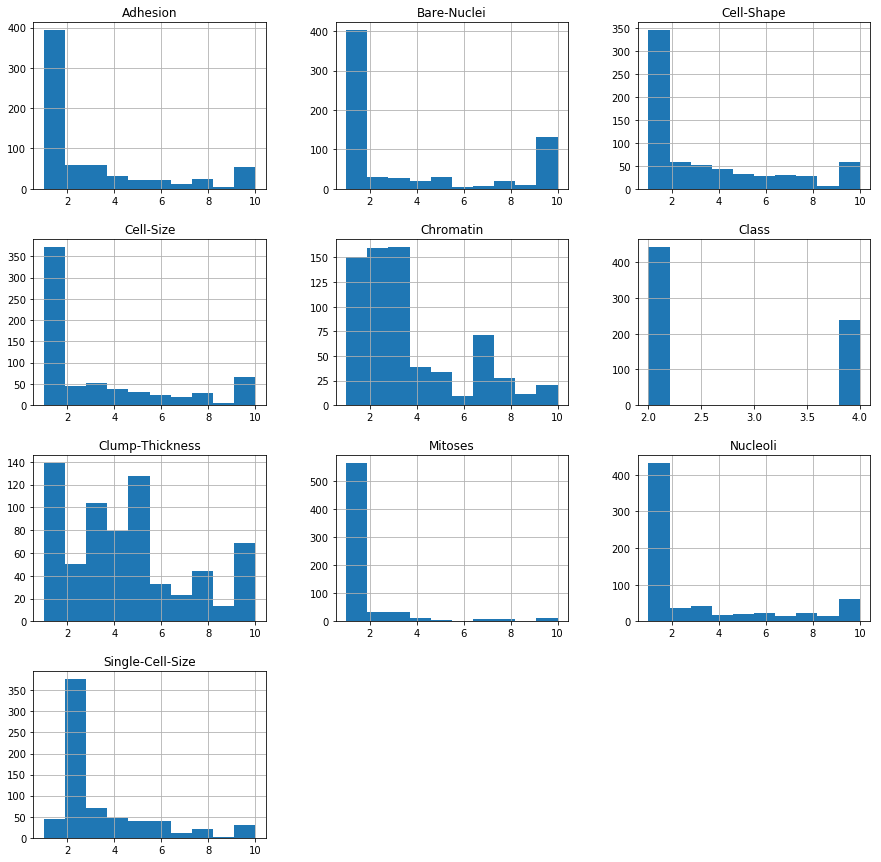

In [13]:
# histograms
dataset.hist()
plt.show()

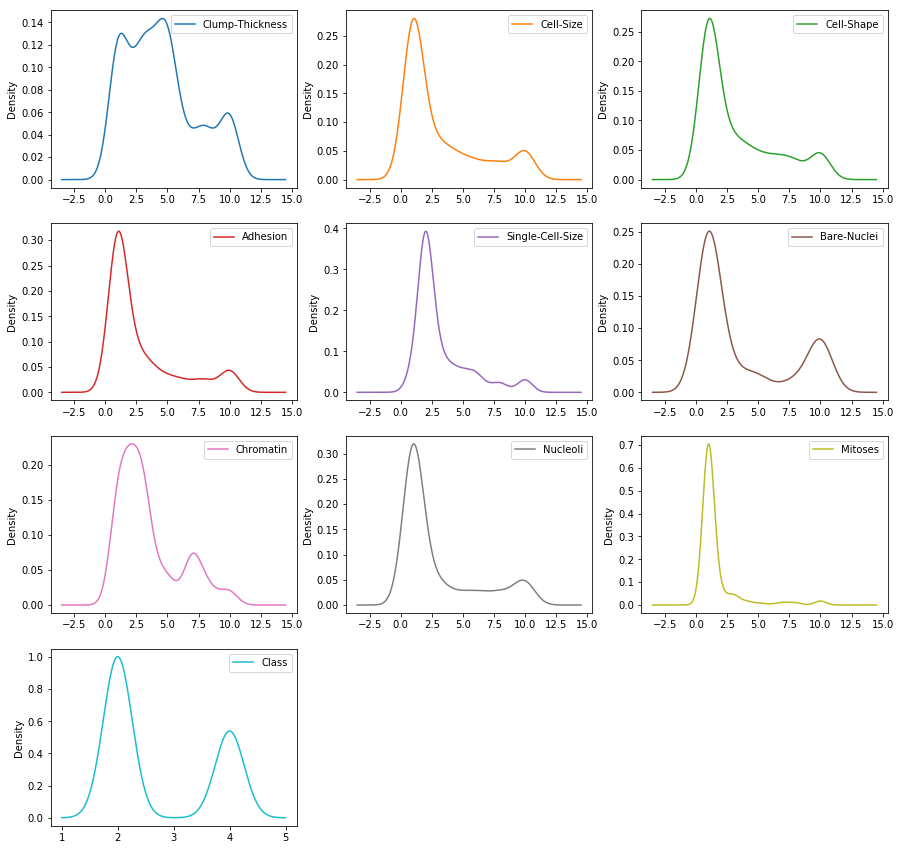

In [14]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

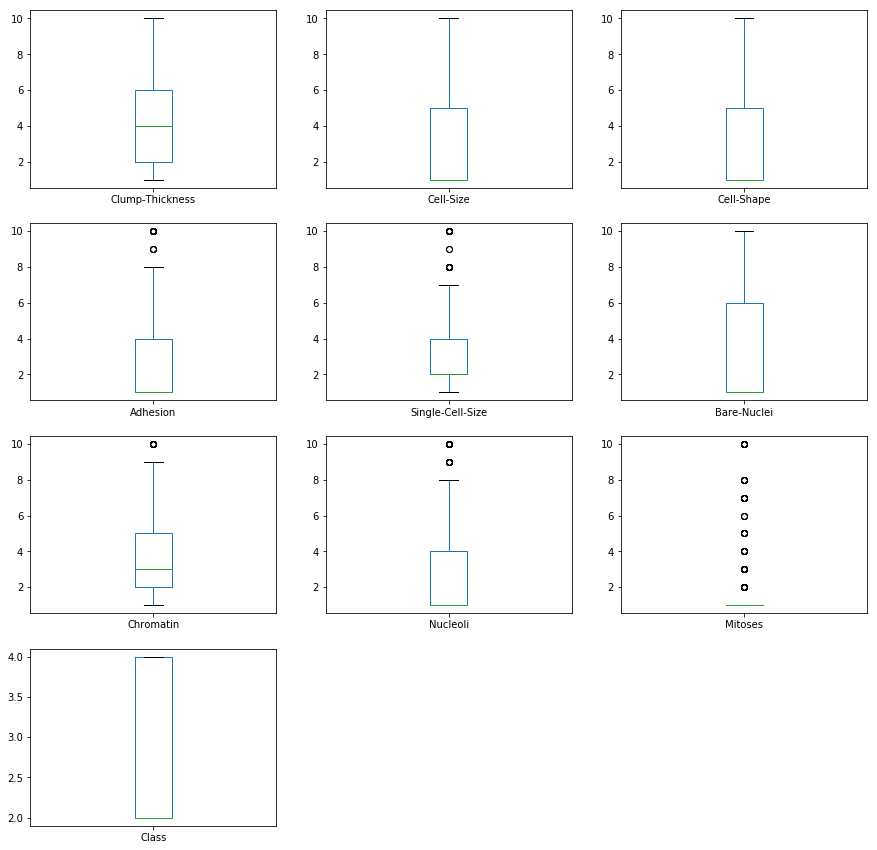

In [15]:
# box plots
dataset.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False)
plt.show()

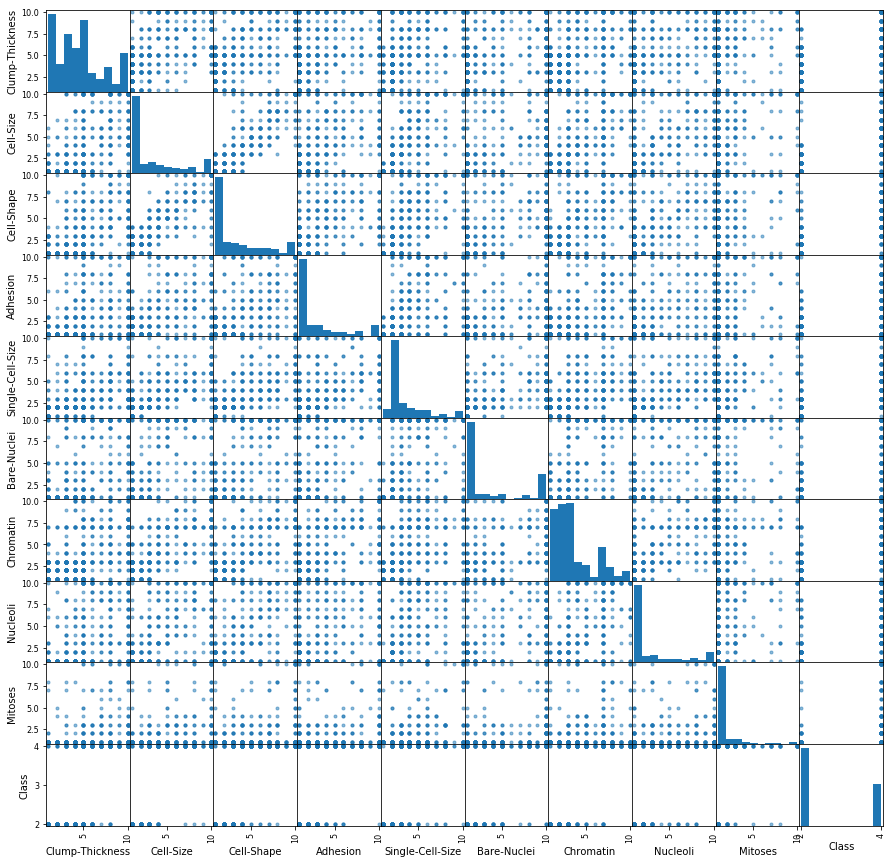

In [16]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

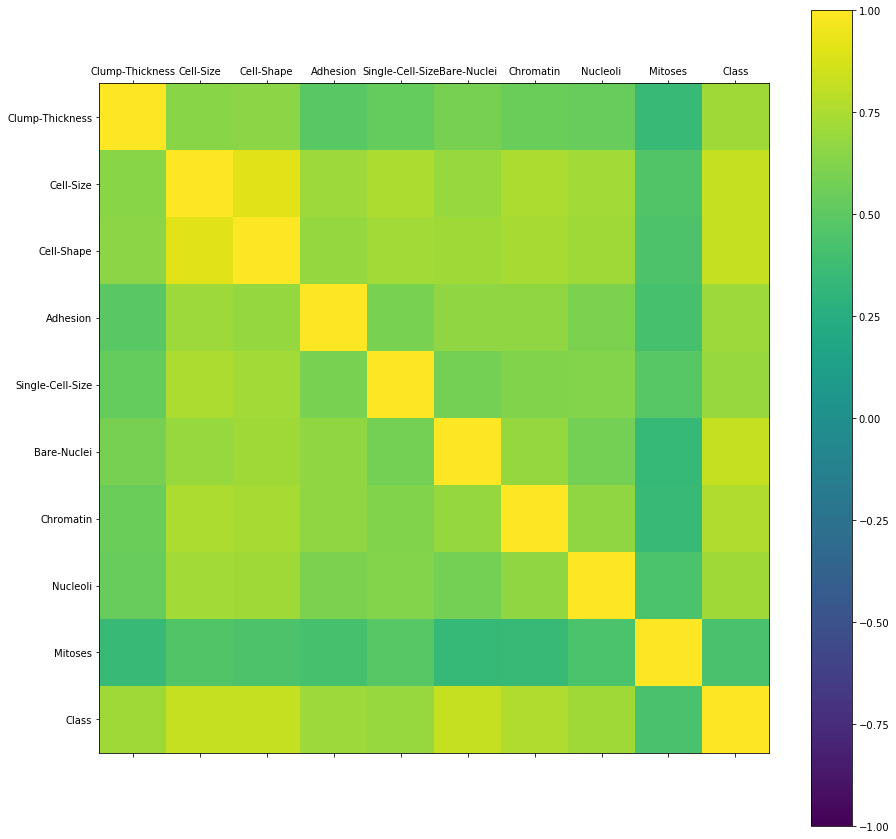

In [17]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names[1:11])
ax.set_yticklabels(names[1:11])
plt.show()

In [18]:
# Determine the size of figures made by pyplot
plt.rcParams['figure.figsize'] = (10,6)

## 5.  Preparation

In [19]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:9]
Y = array[:,9]
test_size = 0.20
seed = 15
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=seed)



In [20]:
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

## 6. Learn models

### Base models

In [21]:
from sklearn.neural_network import MLPClassifier

In [22]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('MLP', MLPClassifier()))

In [23]:
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=5, p=2,
             weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              presort=False, random_state=None, splitter='best')),
 ('NB', GaussianNB(priors=None)),
 ('RF',
  Rand

In [24]:
results = []
names = []

kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)

for name, model in models:
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "[%s]\tmean: %f\tstd: %f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[LR]	mean: 0.965219	std: 0.019105
[LDA]	mean: 0.963367	std: 0.018253
[KNN]	mean: 0.967071	std: 0.026935
[CART]	mean: 0.932222	std: 0.029495
[NB]	mean: 0.970741	std: 0.012114
[RF]	mean: 0.965185	std: 0.019205


/Users/kth/anaconda3/envs/ml_edu/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/kth/anaconda3/envs/ml_edu/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/kth/anaconda3/envs/ml_edu/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/kth/anaconda3/envs/ml_edu/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), Conv

[MLP]	mean: 0.967071	std: 0.025534


/Users/kth/anaconda3/envs/ml_edu/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


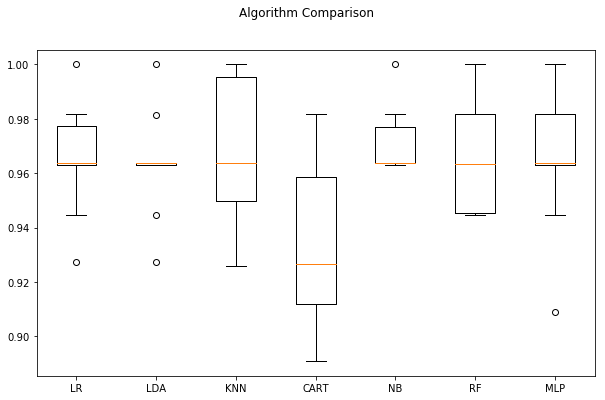

In [25]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


### Base models with standardization

In [26]:
# Standardize the dataset
models = []
models.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
models.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
models.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
models.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
models.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
models.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))

In [27]:
models

[('ScaledLR',
  Pipeline(steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False))])),
 ('ScaledLDA',
  Pipeline(steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001))])),
 ('ScaledKNN',
  Pipeline(steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=5, p=2,
             weights='uniform'))])),
 ('ScaledCART',
  Pipeline(steps=[('Scaler', StandardScaler(copy=True, wit

In [28]:
results = []
names = []
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
for name, model in models:
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "[%s]\tmean: %f\tstd: %f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[ScaledLR]	mean: 0.967071	std: 0.017858
[ScaledLDA]	mean: 0.963367	std: 0.018253
[ScaledKNN]	mean: 0.968923	std: 0.024576
[ScaledCART]	mean: 0.939562	std: 0.016452
[ScaledNB]	mean: 0.970741	std: 0.012114
[ScaledRF]	mean: 0.963333	std: 0.014305


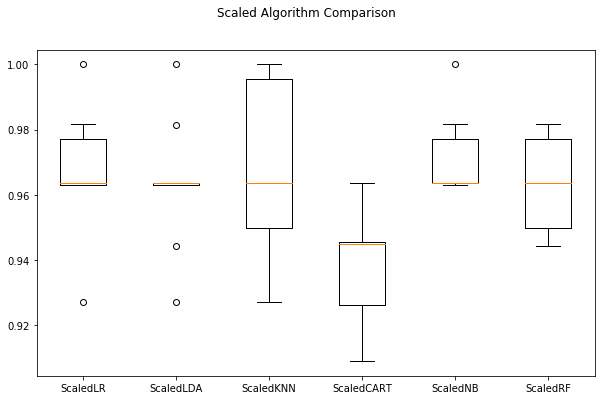

In [29]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Base models with normalization

In [30]:
# Normalize the dataset
models = []
models.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LR', LogisticRegression())])))
models.append(('ScaledLDA', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LDA', LinearDiscriminantAnalysis())])))
models.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('KNN', KNeighborsClassifier())])))
models.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('CART', DecisionTreeClassifier())])))
models.append(('ScaledNB', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('NB', GaussianNB())])))
models.append(('ScaledRF', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('RF', RandomForestClassifier())])))
results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "[%s]\tmean: %f\tstd: %f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[ScaledLR]	mean: 0.968889	std: 0.020057
[ScaledLDA]	mean: 0.963367	std: 0.018253
[ScaledKNN]	mean: 0.967071	std: 0.026935
[ScaledCART]	mean: 0.932222	std: 0.024607
[ScaledNB]	mean: 0.970741	std: 0.012114
[ScaledRF]	mean: 0.963434	std: 0.019982


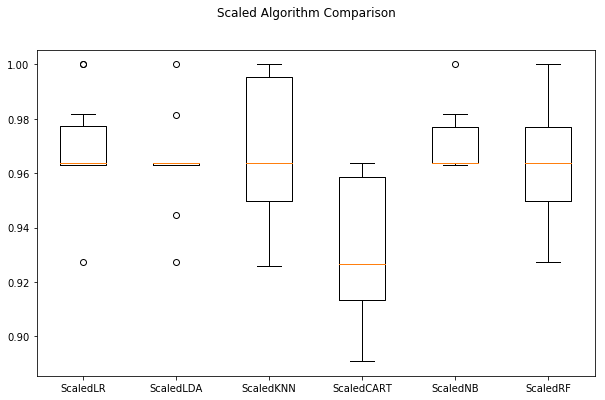

In [31]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Parameter tuning: k-NN classifier

In [32]:
# Tune scaled-KNN
# scaler = StandardScaler().fit(X_train)
# rescaledX = scaler.transform(X_train)

model = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])

neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = {'KNN__n_neighbors':neighbors} # Pipeline을 이용한 경우, 어떤 모델의 파라미터를 조정할 것인지 정의해야만 함

# for neighbor in neighbors:
#     for param2 in param2_set:
#         model = KNeighborsClassifier(n_neighbors=neighbor, param2 = param2)
#     ....

kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.972527 using {'KNN__n_neighbors': 3}
0.957912 (0.020114) with: {'KNN__n_neighbors': 1}
0.972593 (0.022008) with: {'KNN__n_neighbors': 3}
0.968923 (0.024576) with: {'KNN__n_neighbors': 5}
0.967037 (0.021391) with: {'KNN__n_neighbors': 7}
0.968923 (0.021606) with: {'KNN__n_neighbors': 9}
0.970707 (0.020321) with: {'KNN__n_neighbors': 11}
0.968889 (0.023120) with: {'KNN__n_neighbors': 13}
0.968855 (0.021737) with: {'KNN__n_neighbors': 15}
0.968855 (0.021737) with: {'KNN__n_neighbors': 17}
0.970673 (0.020424) with: {'KNN__n_neighbors': 19}
0.970673 (0.020424) with: {'KNN__n_neighbors': 21}


/Users/kth/anaconda3/envs/ml_edu/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [33]:
fine_tuned_scaled_KNN = grid_result.best_estimator_
print(fine_tuned_scaled_KNN)

Pipeline(steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'))])


## Exercise 1
- GridSearchCV를 이용하여 RandomForestClassifier의 성능을 높여보세요.
- 변화를 줄 parameter: n_estimators, max_features
- 각 parameter의 후보군은 각자 세팅해보시기 바랍니다.

In [34]:
?RandomForestClassifier

In [35]:
model = RandomForestClassifier()

n_estimators_set = [5, 10, 15, 20, 25, 30, 35, 40]
max_features_set = ["sqrt", "log2", None]
param_grid = dict(n_estimators = n_estimators_set,
                  max_features = max_features_set)
# param_grid = {'n_estimators': n_estimators_set,
#               'max_features': max_features_set}

kfold = cross_validation.KFold(n = num_instances, n_folds = num_folds, random_state = seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.972527 using {'n_estimators': 25, 'max_features': 'sqrt'}
0.959731 (0.026918) with: {'n_estimators': 5, 'max_features': 'sqrt'}
0.970707 (0.014733) with: {'n_estimators': 10, 'max_features': 'sqrt'}
0.965253 (0.019069) with: {'n_estimators': 15, 'max_features': 'sqrt'}
0.968923 (0.018291) with: {'n_estimators': 20, 'max_features': 'sqrt'}
0.972593 (0.016838) with: {'n_estimators': 25, 'max_features': 'sqrt'}
0.970741 (0.018709) with: {'n_estimators': 30, 'max_features': 'sqrt'}
0.972559 (0.016966) with: {'n_estimators': 35, 'max_features': 'sqrt'}
0.972593 (0.016838) with: {'n_estimators': 40, 'max_features': 'sqrt'}
0.967071 (0.019685) with: {'n_estimators': 5, 'max_features': 'log2'}
0.967071 (0.019685) with: {'n_estimators': 10, 'max_features': 'log2'}
0.967003 (0.015993) with: {'n_estimators': 15, 'max_features': 'log2'}
0.961549 (0.017199) with: {'n_estimators': 20, 'max_features': 'log2'}
0.970707 (0.018690) with: {'n_estimators': 25, 'max_features': 'log2'}
0.967037 (0.0

/Users/kth/anaconda3/envs/ml_edu/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [36]:
fine_tuned_RF = grid_result.best_estimator_
# fine_tuned_RF.fit(X_train, Y_train)
fine_tuned_RF.feature_importances_

array([ 0.0351134 ,  0.17377263,  0.20064941,  0.02091517,  0.06844562,
        0.38450657,  0.08193522,  0.02862506,  0.00603693])

In [ ]:
dataset.columns[0:-1]

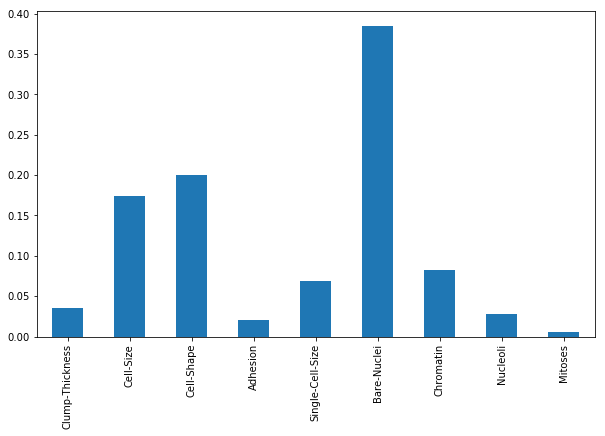

In [37]:
importances = pd.Series(fine_tuned_RF.feature_importances_, index = dataset.columns[0:-1])
importances.plot(kind='bar')

## Exercise 2
- 지금까지의 모델링은 Train set을 cross-validation한 부분까지 완성되어 있습니다.
- 만들어진 모델을 Test set에 적용하여 예측성능을 평가해주세요.

In [38]:
tuned_models = []
tuned_models.append(('Tuned_scaled_KNN', fine_tuned_scaled_KNN))
tuned_models.append(('Tuned_RF', fine_tuned_RF))

In [39]:
tuned_models

[('Tuned_scaled_KNN',
  Pipeline(steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=3, p=2,
             weights='uniform'))])),
 ('Tuned_RF',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=25, n_jobs=1, oob_score=False, random_state=None,
              verbose=0, warm_start=False))]

In [40]:
cms = []
scores = []
names = []
for name, model in tuned_models:
    Y_test_hat = model.predict(X_test)
    cms.append(confusion_matrix(Y_test, Y_test_hat))
    scores.append(accuracy_score(Y_test, Y_test_hat))
    names.append(name)

In [41]:
for name, score, cm in list(zip(names, scores, cms)):
    print('\n[%s]' % name)
    print('- test accuracy: %f' % score)
    print('- cm :\n', cm)


[Tuned_scaled_KNN]
- test accuracy: 0.956204
- cm :
 [[79  2]
 [ 4 52]]

[Tuned_RF]
- test accuracy: 0.963504
- cm :
 [[79  2]
 [ 3 53]]


## Support Vector Classifier

In [42]:
from sklearn.svm import SVC

In [43]:
?SVC

In [44]:
%time

model = SVC()

C_set = [1, 10, 50, 100]
# kernel_set = ["rbf"]
# gamma_set = [0.01, 0.05, 0.1, 0.5]

kernel_set = ["linear", "poly", "rbf"]
degree_set = [2, 3, 4, 5]
gamma_set = [0.01, 0.05, 0.1, 0.5]

param_grid = dict(C=C_set, 
                  kernel=kernel_set, 
                  degree=degree_set, 
                  gamma=gamma_set)

kfold = cross_validation.KFold(n = num_instances, n_folds = num_folds, random_state = seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
Best: 0.970696 using {'kernel': 'linear', 'degree': 2, 'C': 1, 'gamma': 0.01}
0.970774 (0.018530) with: {'kernel': 'linear', 'degree': 2, 'C': 1, 'gamma': 0.01}
0.970774 (0.018530) with: {'kernel': 'poly', 'degree': 2, 'C': 1, 'gamma': 0.01}
0.970741 (0.016703) with: {'kernel': 'rbf', 'degree': 2, 'C': 1, 'gamma': 0.01}
0.970774 (0.018530) with: {'kernel': 'linear', 'degree': 2, 'C': 1, 'gamma': 0.05}
0.957946 (0.019969) with: {'kernel': 'poly', 'degree': 2, 'C': 1, 'gamma': 0.05}
0.970774 (0.020297) with: {'kernel': 'rbf', 'degree': 2, 'C': 1, 'gamma': 0.05}
0.970774 (0.018530) with: {'kernel': 'linear', 'degree': 2, 'C': 1, 'gamma': 0.1}
0.948754 (0.021150) with: {'kernel': 'poly', 'degree': 2, 'C': 1, 'gamma': 0.1}
0.965253 (0.017249) with: {'kernel': 'rbf', 'degree': 2, 'C': 1, 'gamma': 0.1}
0.970774 (0.018530) with: {'kernel': 'linear', 'degree': 2, 'C': 1, 'gamma': 0.5}
0.937677 (0.020497) with: {'kernel': 'poly', 'd

/Users/kth/anaconda3/envs/ml_edu/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


## Ensembles

Scikit-learn에서 기본적으로 제공하는 앙상블 모델
- BaggingClassifier
- ExtraTreesClassifier
- AdaBoostClassifier
- GradientBoostingClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [46]:
ensembles = []
ensembles.append(
    ('SimpleBaggingTree', 
     BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       n_estimators=50)
    )
)

In [47]:
ensembles.append(
    ('ExtraTrees', 
     ExtraTreesClassifier(n_estimators=50,
                          max_features=5)
    )
)

In [48]:
ensembles.append(
    ('AdaBoost', 
     AdaBoostClassifier(n_estimators=50)
    )
)

In [49]:
ensembles.append(
    ('GradientBoosting',
     GradientBoostingClassifier(n_estimators=50)
    )
)

In [50]:
ensembles

[('SimpleBaggingTree',
  BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              presort=False, random_state=None, splitter='best'),
           bootstrap=True, bootstrap_features=False, max_features=1.0,
           max_samples=1.0, n_estimators=50, n_jobs=1, oob_score=False,
           random_state=None, verbose=0, warm_start=False)),
 ('ExtraTrees',
  ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
             max_depth=None, max_features=5, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
             verbose=0, warm_start=False)),
 ('AdaBoost', A

In [51]:
for name, model in ensembles:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "[%s]\tmean: %f\tstd: %f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[SimpleBaggingTree]	mean: 0.965219	std: 0.022354
[ExtraTrees]	mean: 0.967104	std: 0.017886
[AdaBoost]	mean: 0.959731	std: 0.021450
[GradientBoosting]	mean: 0.952458	std: 0.023319


- Voting classifier: 여러 개의 모델을 하나의 데이터셋에 학습한 후, 투표

In [52]:
from sklearn.ensemble import VotingClassifier

In [53]:
estimators = []
estimators.append(('Logit', LogisticRegression(penalty='l2', C=1)))
estimators.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
estimators.append(('CART', DecisionTreeClassifier(max_depth=4)))
estimators.append(('NB', GaussianNB()))
estimators.append(('RF', RandomForestClassifier(n_estimators=50)))

In [54]:
voting_ensemble = VotingClassifier(estimators,
                                   voting='soft')

In [55]:
?VotingClassifier

In [56]:
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
cv_results = cross_validation.cross_val_score(voting_ensemble, X_train, Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
msg = "[%s]\tmean: %f\tstd: %f" % ('[voting_ensemble]', cv_results.mean(), cv_results.std())
print(msg)

[[voting_ensemble]]	mean: 0.972559	std: 0.018814


- XGBoost

In [57]:
from xgboost import XGBClassifier

In [58]:
xgb = XGBClassifier(n_estimators = 100,
                    learning_rate = 0.05,
                    nthread = 2)

In [59]:
?XGBClassifier

In [60]:
param_grid = {
    'max_depth': [3, 4, 5],
    'gamma': [0, 0.5, 1]
}

In [61]:
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.961538 using {'max_depth': 3, 'gamma': 0}
0.961549 (0.017342) with: {'max_depth': 3, 'gamma': 0}
0.961549 (0.020927) with: {'max_depth': 4, 'gamma': 0}
0.959731 (0.022939) with: {'max_depth': 5, 'gamma': 0}
0.961549 (0.017342) with: {'max_depth': 3, 'gamma': 0.5}
0.959697 (0.018066) with: {'max_depth': 4, 'gamma': 0.5}
0.957879 (0.020197) with: {'max_depth': 5, 'gamma': 0.5}
0.961549 (0.019218) with: {'max_depth': 3, 'gamma': 1}
0.961549 (0.020927) with: {'max_depth': 4, 'gamma': 1}
0.961549 (0.020927) with: {'max_depth': 5, 'gamma': 1}


/Users/kth/anaconda3/envs/ml_edu/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


- Stacking: 구현되어 있지 않아서, 직접 짜서 써야 합니다.

앞서 parameter search를 수행한 두 모델 fine_tuned_scaled_KNN과 fine_tuned_RF를 사용하도록 합시다

<Training phase>

Training phase

In [62]:
estimators = [fine_tuned_scaled_KNN, fine_tuned_RF]

In [63]:
predicted_values = []
for estimator in estimators:
    Y_train_hat = estimator.predict(X_train)
    predicted_values.append(Y_train_hat)

In [64]:
predicted_values

[array([ 2.,  2.,  2.,  2.,  4.,  2.,  4.,  2.,  4.,  2.,  2.,  2.,  2.,
         4.,  2.,  2.,  2.,  2.,  4.,  2.,  4.,  4.,  4.,  4.,  2.,  2.,
         2.,  4.,  4.,  2.,  4.,  2.,  2.,  2.,  2.,  4.,  4.,  2.,  2.,
         4.,  4.,  2.,  2.,  2.,  2.,  2.,  2.,  4.,  2.,  4.,  2.,  4.,
         2.,  2.,  2.,  2.,  2.,  2.,  4.,  4.,  2.,  2.,  4.,  2.,  2.,
         2.,  2.,  4.,  4.,  4.,  2.,  4.,  2.,  4.,  2.,  4.,  4.,  4.,
         2.,  2.,  2.,  2.,  2.,  2.,  4.,  2.,  2.,  2.,  2.,  2.,  2.,
         4.,  4.,  4.,  2.,  4.,  2.,  2.,  2.,  2.,  4.,  4.,  4.,  4.,
         2.,  4.,  2.,  2.,  2.,  4.,  4.,  2.,  4.,  4.,  4.,  4.,  4.,
         2.,  2.,  2.,  4.,  2.,  2.,  2.,  2.,  2.,  4.,  4.,  4.,  2.,
         2.,  2.,  2.,  2.,  2.,  2.,  2.,  4.,  2.,  2.,  2.,  4.,  2.,
         2.,  4.,  4.,  2.,  2.,  4.,  2.,  2.,  4.,  4.,  2.,  2.,  2.,
         2.,  2.,  2.,  2.,  4.,  2.,  2.,  4.,  2.,  2.,  2.,  4.,  2.,
         2.,  4.,  2.,  2.,  4.,  2.,  2.,  2.,  2.

In [65]:
new_X_train = np.asarray(list(zip(predicted_values[0], predicted_values[1])))

In [66]:
new_X_train.shape

(546, 2)

In [67]:
meta_estimator = LogisticRegression(penalty='l2', C=1)
meta_estimator.fit(new_X_train, Y_train)
Y_train_hat = meta_estimator.predict(new_X_train)

In [68]:
confusion_matrix(Y_train, Y_train_hat)

array([[362,   1],
       [  0, 183]])

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_train, Y_train_hat)

0.99816849816849818

Test phase

In [70]:
predicted_values = []
for estimator in estimators:
    Y_test_hat = estimator.predict(X_test)
    predicted_values.append(Y_test_hat)

In [71]:
new_X_test = np.asarray(list(zip(predicted_values[0], predicted_values[1])))

In [72]:
Y_test_hat = meta_estimator.predict(new_X_test)

In [73]:
confusion_matrix(Y_test, Y_test_hat)

array([[79,  2],
       [ 3, 53]])

In [75]:
accuracy_score(Y_test, Y_test_hat)

0.96350364963503654